<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data-Sources/blob/main/CDC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [4]:
print('Welcome to CDC Statistics')
print('')
print('Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.')
userinput = input('Please put state here:')

Welcome to CDC Statistics

Please tell me which state you would like to see. Type abbreivated name of state in caps. EX: FL,GA etc.
Please put state here:FL


**Framework for Cases and Deaths from The CDC**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# reading in the data
df = pd.read_csv('CDC Data.csv')

In [7]:
df = df.loc[:,['submission_date','state','tot_cases','tot_death']]

In [8]:
df['cases'] = df.tot_cases
df['Deaths'] = df.tot_death
df['date'] = df.submission_date

In [9]:
df = df.drop(columns=['tot_cases','tot_death','submission_date'])

In [10]:
df = df[df.state == userinput]

In [11]:
# cleaning data
df = df.reset_index(drop = True)

In [12]:
# setting datetime index 
df.date = pd.to_datetime(df.date)

In [13]:
# cleaning data
df = df.sort_values(by = 'date', ascending=True)

In [14]:
# cleaning data
df = df.reset_index(drop = True)

In [15]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']
df = df[df.date <= '2021-02-21']

In [16]:
# cleaning data
df = df.reset_index(drop = True)

In [17]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)


In [18]:
df.loc[0, 'Avg day of case'] = np.nan
df.loc[0, 'Avg day of death'] = np.nan

In [19]:
if df.loc[0,'cases'] != 0:
  df.loc[0,'Avg day of case'] = df.loc[0,'Day']

In [20]:
if df.loc[0,'Deaths'] != 0:
  df.loc[0,'Avg day of death'] = df.loc[0,'Day']

In [21]:
# calulating Average day of Case
for i in range(1,len(df)):
  if df.loc[i-1, 'cases']!=0 and df.loc[i, 'cases']!=0:
    x = (((df.loc[i, 'cases'] - df.loc[i-1, 'cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'cases'])) + (df.loc[i-1, 'Avg day of case'])
    df.loc[i, 'Avg day of case'] = x
  elif df.loc[i-1, 'cases'] ==0 and df.loc[i, 'cases']!=0:
    x = df.loc[i, 'Day']
    df.loc[i, 'Avg day of case'] = x
  else:
     df.loc[i, 'Avg day of case'] = np.nan

In [22]:
# calulating Avgerage day of death
for i in range(1,len(df)):
  if df.loc[i-1, 'Deaths']!=0 and df.loc[i, 'Deaths']!=0:
    x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
    df.loc[i, 'Avg day of death'] = x
  elif df.loc[i-1, 'Deaths'] ==0 and df.loc[i, 'Deaths']!=0:
    x = df.loc[i, 'Day']
    df.loc[i, 'Avg day of death'] = x
  else:
     df.loc[i, 'Avg day of death'] = np.nan

In [23]:
# creating the CDF Column
df['cdf_cases'] = df['cases']

In [24]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [25]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index(drop = True)

In [26]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [27]:
# difference of avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [28]:
# avg day of case/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [29]:
# avg day of death/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [30]:
df['Avg Case Day - Avg Death Day']= df['Avg day of case']- df['Avg day of death']

In [31]:
df

,state,cases,Deaths,date,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day,Avg Case Day - Avg Death Day
0,FL,0,0,2020-03-01,1.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,FL,1,0,2020-03-02,2.0,2.000000,NaN,5.45046e-07,0,NaN,1.000000,NaN,NaN
2,FL,2,0,2020-03-03,3.0,2.500000,NaN,1.09009e-06,0,NaN,0.833333,NaN,NaN
3,FL,2,0,2020-03-04,4.0,2.500000,NaN,1.09009e-06,0,NaN,0.625000,NaN,NaN
4,FL,3,0,2020-03-05,5.0,3.333333,NaN,1.63514e-06,0,NaN,0.666667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,FL,1811078,29311,2021-02-17,354.0,237.315465,223.541162,0.987121,0.980104,-13.774303,0.670383,0.631472,13.774303
354,FL,1816108,29474,2021-02-18,355.0,237.641411,224.268169,0.989862,0.985555,-13.373242,0.669412,0.631741,13.373242
355,FL,1822644,29692,2021-02-19,356.0,238.065844,225.235350,0.993425,0.992844,-12.830495,0.668724,0.632684,12.830495
356,FL,1829773,29813,2021-02-20,357.0,238.529225,225.770134,0.99731,0.99689,-12.759091,0.668149,0.632409,12.759091


In [32]:
pd.set_option('max_rows', 99999)

 **Statistics**

In [33]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1].round(2)
averagedayofdeath = df['Avg day of death'].iloc[-1].round(2)
differDeaths = df['Avg Death Day - Avg Case Day'].max()
dateofdifferDeath = df.loc[df['Avg Death Day - Avg Case Day'].idxmax(), 'date']
dateofdifferCase = df.loc[df['Avg Case Day - Avg Death Day'].idxmax(), 'date']
differCases= df['Avg Case Day - Avg Death Day'].max()
datesDeathDayGreaterThanCase = df['date'].where(df['Avg day of death']>df['Avg day of case'])

In [34]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Amount:', differDeaths,'Days',',','Day = ',dateofdifferDeath)
print('Days When Average Dates of Cases Differ By Largest Amounts')
print('Amount:',differCases,'Days',',','Day = ',dateofdifferCase)
print("The number of days per month where Average Death Day is greater than Average Case Day:")
datesDeathDayGreaterThanCase.groupby(datesDeathDayGreaterThanCase.dt.month).count()

COVID-19 STATISTICS

State =  FL
Average Day of Death and Average Day of Case as of 2021-02-21 00:00:00
Case = 238.85
Death =  226.18
Days When Average Dates of Death Differ By Largest Amounts
Amount: 7.4962963854623865 Days , Day =  2020-10-21 00:00:00
Days When Average Dates of Cases Differ By Largest Amounts
Amount: 24.757500339853607 Days , Day =  2020-07-13 00:00:00
The number of days per month where Average Death Day is greater than Average Case Day:


date
3.0      3
4.0     29
5.0     31
6.0     14
9.0     20
10.0    31
11.0    16
Name: date, dtype: int64

**Data Visualization**

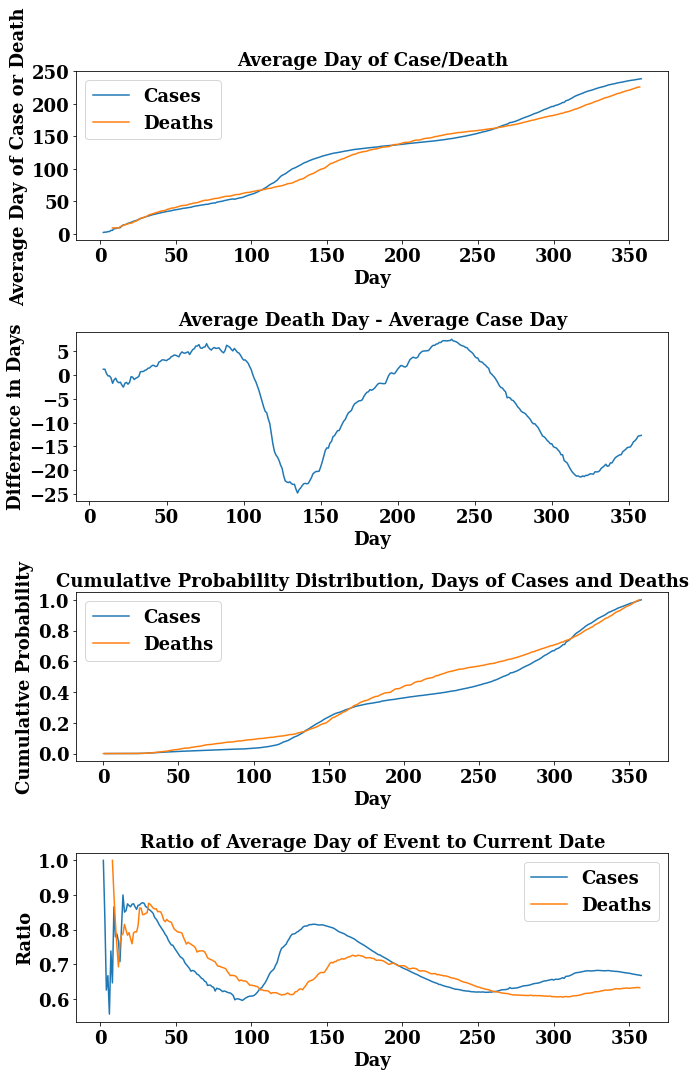

In [35]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
params = {'axes.labelsize': 18,'axes.titlesize':18, 'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update(params)
plt.figure(figsize = (10,15))

plt.subplot(4,1,1)
plt.plot(df['Day'], df['Avg day of case'],df['Avg day of death'])
plt.title('Average Day of Case/Death',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Average Day of Case or Death')
plt.legend(['Cases','Deaths'])

plt.subplot(4,1,2)
plt.plot(df['Day'], df['Avg Death Day - Avg Case Day'])
plt.title('Average Death Day - Average Case Day',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Difference in Days')

plt.subplot(4,1,3)
plt.plot(df['Day'],df['cdf_cases'],df['cdf_deaths'])
plt.title('Cumulative Probability Distribution, Days of Cases and Deaths',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Cumulative Probability')
plt.legend(['Cases','Deaths'])

plt.subplot(4,1,4)
plt.plot(df['Day'], df['Avg Day of Case/ Current Day'], df['Avg Day of Death/ Current Day'])
plt.title('Ratio of Average Day of Event to Current Date',weight = 'bold')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.legend(['Cases','Deaths'])

plt.tight_layout()
plt.style.use('seaborn')

plt.savefig("image10.png")